In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer, TfidfVectorizer
from nltk.tokenize import PunktSentenceTokenizer, WordPunctTokenizer
from nltk.corpus import stopwords
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster
from scipy.spatial.distance import pdist
from sklearn.manifold import TSNE
from sklearn import metrics
%matplotlib inline

In [2]:
title = pd.read_csv('titledf.csv', names = ['Title'])

In [3]:
title.head()

,Title
0,Help with audio set-up
1,Optimizing code for speed
2,Seeking Tales of Development Woe (and Triumph)...
3,[Java] Finding smallest value in an array
4,currying functions using functools


In [4]:
tfidfv = TfidfVectorizer(stop_words='english',ngram_range=(1,2))

In [5]:
tfidf_vectorized = tfidfv.fit_transform(title['Title'])

In [6]:
tfidf_vectorized.shape

(24594, 100767)

In [7]:
tsvd = TruncatedSVD()

In [8]:
tsvd_transformed = tsvd.fit_transform(tfidf_vectorized)

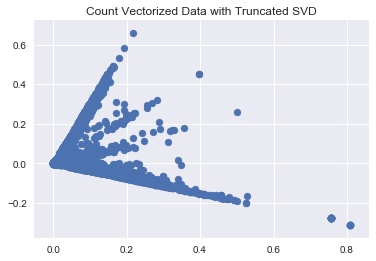

In [9]:
plt.scatter(tsvd_transformed[:,0], tsvd_transformed[:,1])
plt.title('Count Vectorized Data with Truncated SVD')

In [10]:
tsvd.explained_variance_ratio_.sum()

0.0071352646005026698

In [11]:
tsvd50 = TruncatedSVD(n_components=50)

In [12]:
tsvd50_transformed = tsvd50.fit_transform(tfidf_vectorized)

In [13]:
tsvd50.explained_variance_ratio_.sum()

0.054056683879251582

In [14]:
tsvd250 = TruncatedSVD(n_components=250)

In [15]:
tsvd250_transformed = tsvd250.fit_transform(tfidf_vectorized)

In [16]:
tsvd250.explained_variance_ratio_.sum()

0.13652448722919974

In [17]:
ac = AgglomerativeClustering(n_clusters=2)

In [21]:
labels = ac.fit_predict(tsvd50_transformed)

In [19]:
tsne = TSNE()

In [20]:
tsne50 = tsne.fit_transform(tsvd50_transformed)

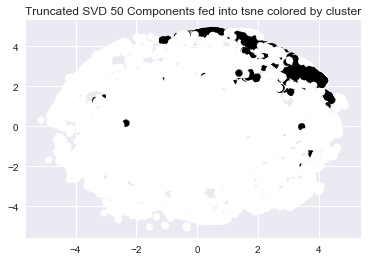

In [24]:
plt.scatter(tsne50[:,0], tsne50[:,1], c = labels)
plt.title('Truncated SVD 50 Components fed into tsne colored by cluster')

In [38]:
labels[64:100]

array([0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [33]:
title.iloc[0]

Title    Help with audio set-up
Name: 0, dtype: object

In [34]:
title.iloc[1]

Title    Optimizing code for speed
Name: 1, dtype: object

In [39]:
title.iloc[65]

Title    HDD Error when installing Windows 10 from .ISO.
Name: 77, dtype: object

In [40]:
title.iloc[69]

Title    Windows 10 "something went wrong" error when t...
Name: 81, dtype: object

In [41]:
title.iloc[72]

Title    Windows 10 broken wallpaper
Name: 84, dtype: object

**Interestingly, it looks like the two groups are different in the sense that cluster 0 has titles that request help for improvement, and cluster 1 has titles that request help with errors**